# Particle orbits in Kerr space-time

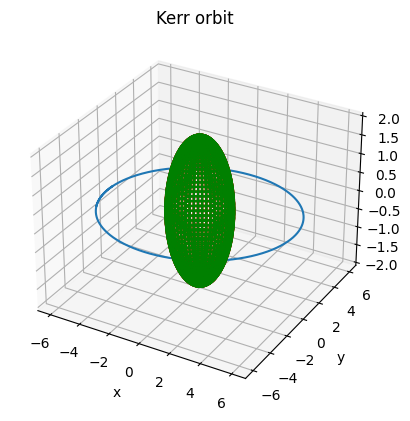

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits.mplot3d import Axes3D

""""
Constants of motion:
    L = angular momentum
    E = energy
    Q = Carter's constant https://en.wikipedia.org/wiki/Carter_constant
    mu = mass of the particle
"""

Delta = lambda r, M, a: r**2 - 2*M*r + a**2
Sigma = lambda r, theta, a: r**2 + a**2*np.cos(theta)**2
Kappa = lambda Q, L, a, E, M: (Q**2 + L**2 + a**2*(E**2+M))

def kerr_EOM(t, y, M, a, L, E, Q, H):
    """"
    Equations of motion for particle in Kerr orbit:

    Equations came from "Radiation transfer of emission lines in curved space-time, S. V. Fuerst, K. Wu",
    equations (21), (22), (24), (27), (30) and (31).

    Parameters
    ----------

    """

    r, theta, phi, t_prime, p_r, p_theta = y

    sigma = Sigma(r, theta, a)
    delta = Delta(r, M, a)
    kappa = Kappa(Q, L, a, E, M)
    factor = 1 / (sigma * delta)

    rd = (delta/sigma) * p_r
    thetad = p_theta/sigma
    phid = (2*a*r*E + (sigma - 2*r)*L/np.sin(theta)**2) * factor
    t_prime_d = E + (2*r*(r**2+a**2)*E - 2*a*r*L) * factor
    p_rd = factor * (((r**2 + a**2)*H - kappa) * (r - 1) + r*delta*H + 2*r*(r**2 + a**2)*E**2 - 2*a*E*L) - 2*p_r**2*(r - 1)/sigma
    p_thetad = np.sin(theta)*np.cos(theta)/sigma * (L**2/np.sin(theta)**4 - a**2*(E**2 + H))


    return [rd, thetad, phid, t_prime_d, p_rd, p_thetad]

def solve_EOM(t_span, y0, params, t_eval):
    """Solve equations of motion for Kerr black hole particle orbit"""
    # Solve ODE
    sol = solve_ivp(kerr_EOM, t_span, y0, args=params, method='Radau', t_eval=t_eval, rtol=1e-9, atol=1e-9)

    # Extract solution
    r = sol.y[0]
    theta = sol.y[1]
    phi = sol.y[2]

    # Convert from polar to cartesian coordinates
    x, y, z = r*np.sin(theta)*np.cos(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(theta)

    return x, y, z

def plot_trajectory(x, y, z, title="Kerr orbit", show=True):
    # Plot the particle's orbit
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)                                # Plot the orbit

    # Plot black hole event horizon surface
    Reh = M + np.sqrt(M**2 - a**2)
    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
    xb = Reh * np.cos(u)*np.sin(v)
    yb = Reh * np.sin(u)*np.sin(v)
    zb = Reh * np.cos(v)
    ax.plot_wireframe(xb, yb, zb, color="r")

    # Plot the black hole ergoregion
    Rs = M + np.sqrt(M**2 - a**2 * np.cos(v))
    xe = Rs * np.cos(u)*np.sin(v)
    ye = Rs * np.sin(u)*np.sin(v)
    ze = Rs * np.cos(v)
    ax.plot_wireframe(xe, ye, ze, color="g")

    # Label axes
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title(title)

    # Set false if want to continue working on plot
    if show:
        plt.show()
    else:
        return fig, ax


########################################################################################################################
###########################             Schwarzschild spacetime, ISCO               ####################################
########################################################################################################################


# Initial conditions, for massive particle circular orbit about a Schwarzschild (spin=0) black hole
r0 = 6.0
theta0 = np.pi/2*3
phi0 = 0.0
t_prime_0 = 0.0
p_r0 = 0.0
p_theta0 = np.sqrt(3)/18

# Constants of motion
G = c = M = 1.0
a = 0.0

# See notebook for derivation of these constants
L = 2*np.sqrt(3)
E = -np.sqrt((1-2*M/r0)*(1+(L/r0)**2))
Q = p_theta0**2 + np.cos(theta0)**2 * (a**2 * (M**2-E**2)+(L**2/np.sin(theta0)**2)**2)
H = -1.0       # 0 for mass-less particles, -1 for massive particles

params = (M, a, L, E, Q, H)

y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]

# Time
T = 70
dt = 1e-3
t_span = [0.0, T]
t = np.arange(0.0, T, 1e-3)

x, y, z = solve_EOM(t_span, y0, params, t)
plot_trajectory(x, y, z)


#### Start adding spin

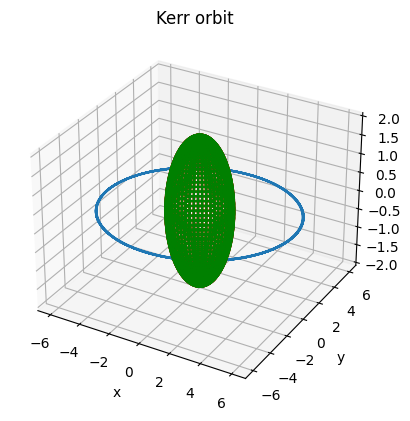

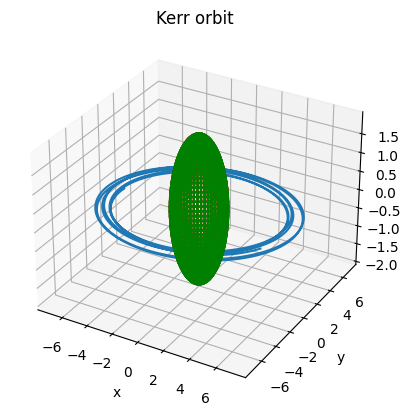

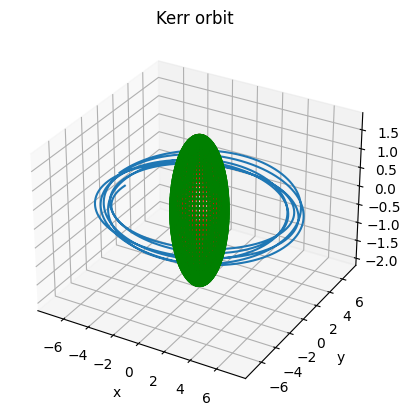

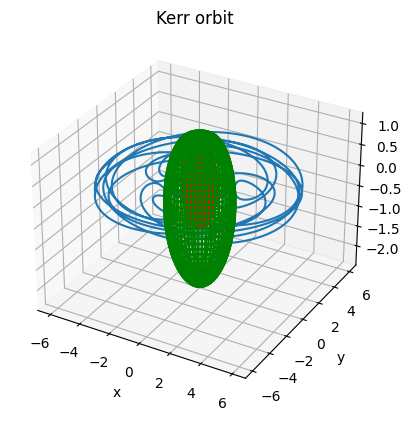

In [134]:
a = 0.00

# Initial conditions, for massive particle circular orbit about a Schwarzschild (spin=0) black hole
r0 = 6.0
theta0 = np.pi/2*3
phi0 = 0.0
t_prime_0 = 0.0
p_r0 = 0.0
p_theta0 = np.sqrt(3)/18


# See notebook for derivation of these constants
L = 2*np.sqrt(3)
E = -np.sqrt((1-2*M/r0)*(1+(L/r0)**2))
Q = p_theta0**2 + np.cos(theta0)**2 * (a**2 * (M**2-E**2)+(L**2/np.sin(theta0)**2)**2)
H = -1.0       # 0 for mass-less particles, -1 for massive particles

params = (M, a, L, E, Q, H)

y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]

# Time
T = 500
dt = 1e-3
t_span = [0.0, T]
t = np.arange(0.0, T, 1e-3)

x, y, z = solve_EOM(t_span, y0, params, t)
plot_trajectory(x, y, z)

a = 0.1
params = (M, a, L, E, Q, H)
y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]
x, y, z = solve_EOM(t_span, y0, params, t)
plot_trajectory(x, y, z)

a = 0.5
params = (M, a, L, E, Q, H)
y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]
x, y, z = solve_EOM(t_span, y0, params, t)
plot_trajectory(x, y, z)

a = 1.0
params = (M, a, L, E, Q, H)
y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]
x, y, z = solve_EOM(t_span, y0, params, t)
plot_trajectory(x, y, z)




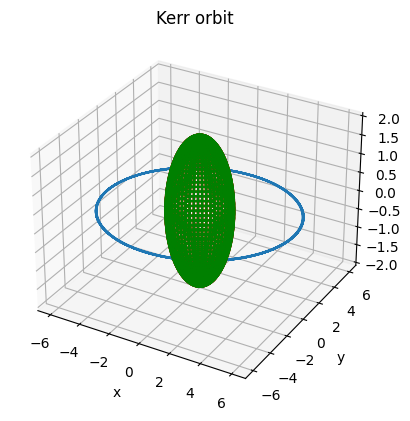

In [139]:
a = 0.00

# Initial conditions, for massive particle circular orbit about a Schwarzschild (spin=0) black hole
r0 = 6.0
theta0 = np.pi/2*3
phi0 = 0.0
t_prime_0 = 0.0
p_r0 = 0.0
p_theta0 = np.sqrt(3)/18


# See notebook for derivation of these constants
L = 2*np.sqrt(3)
E = -np.sqrt((1-2*M/r0)*(1+(L/r0)**2))
Q = p_theta0**2 + np.cos(theta0)**2 * (a**2 * (M**2-E**2)+(L**2/np.sin(theta0)**2)**2)
H = -1.0       # 0 for mass-less particles, -1 for massive particles

params = (M, a, L, E, Q, H)

y0 = [r0, theta0, phi0, t_prime_0, p_r0, p_theta0]

# Time
T = 500
dt = 1e-3
t_span = [0.0, T]
t = np.arange(0.0, T, 1e-3)

x, y, z = solve_EOM(t_span, y0, params, t)
plot_trajectory(x, y, z)

### Code that does not work

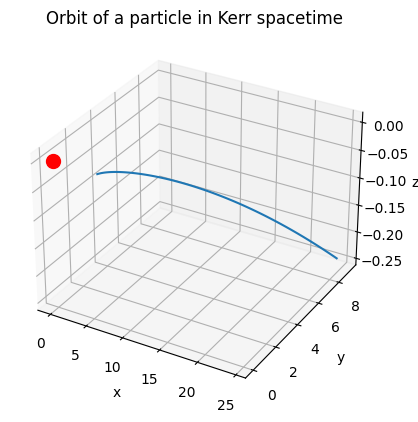

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d


# Define physical constants
G = 1               # gravitational constant
c = 1               # speed of light
M = 1               # mass of the black hole
Rs = 2*G*M/c**2     # Schwarzschild radius of the black hole

def geodesic_eqn_kerr(y, t, M, a):
    r, theta, phi, t, rd, thetad, phid, td = y

    # Define constants
    rho = np.sqrt(r**2 + a**2 * np.cos(theta)**2)
    Delta = r**2 - 2*M*r + a**2

    rdd = - Delta / rho**4 * (
            -M*td**2 + 4*a*M*np.sin(theta)**2 * td * phid - phid*np.sin(theta)**2 * (
                r*rho**2 + a**2*M*np.sin(theta)**2
        )
    )

    thetadd = -phid / rho**4 * (
        4*a*M*r*td*np.sin(2*theta)-np.sin(theta)*np.cos(theta) * phid * (
        (a**2+r**2)*rho**2 + 4*a**2*M*r*np.sin(theta)**2
            )
        )

    phidd_numerator = 2*(-2*a*M*rho**2 *rd*td+(4*a*M*r*(2*M*r-rho**2)/np.tan(theta))*td*thetad
                         + (-2*M*r**2*rho**2+r*rho**4)*rd*phid + (-2*M*r**3*rho**2+a**2*rho**4+r**2*rho**4-2*a**2*M*r*rho**2*np.cos(theta))/np.tan(theta)*thetad*phid + rd*phid*(6*a**2*M**2*r*np.sin(theta)**2+a**2*M*rho**2*np.sin(theta)**2)+4*a**2*M**2*r**2*np.sin(2*theta)*thetad*phid)
    phidd_denominator = -2*M*r**3*rho**2+a**2*rho**4+r**2*rho**4-2*a**2*M*r*rho**2*np.cos(theta)**2+12*a**2*M**2*r**2*np.sin(theta)**2

    phidd = phidd_numerator / phidd_denominator

    tdd_numerator = rd*td*(a**2*M*rho**2+M*r**2*rho**2-6*a**2*M**2*r*np.sin(theta)**2) + rd*phid*(-2*a**3*M*rho**2*np.sin(theta)**2+2*a*M*r**2*rho**2*np.sin(theta)**2) + td*thetad*(-8*a**2*M**2*r**2*np.sin(2*theta)) + thetad*phid*(4*a**3*M**2*r**2*np.sin(theta)**2*np.sin(2*theta))

    tdd_denominator = -2*M*r**3*rho**2+a**2*rho**4+r**2*rho**4-2*a**2*M*r*rho**2*np.cos(theta)**2+12*a**2*M**2*r**2*np.sin(theta)**2

    tdd =tdd_numerator / tdd_denominator


    return [rd, thetad, phid, td, rdd, thetadd, phidd, tdd]

def geodesic_eqn_kerr2(tau, y, M, a, e, l):
    r, theta, phi, t, rd, thetad = y

    # Define constants
    rho = np.sqrt(r**2 + a**2 * np.cos(theta)**2)
    Delta = r**2 - 2*M*r + a**2

    fac1 = (1-2*M/r)
    fac2 = 2*M*a/r

    td = (1/Delta)*((r**2+a**2+fac2*a)*e - fac2*l)
    phid = (1/Delta)*(fac1*l + fac2*e)

    rdd = - Delta / rho**4 * (
            -M*td**2 + 4*a*M*np.sin(theta)**2 * td * phid - phid*np.sin(theta)**2 * (
            r*rho**2 + a**2*M*np.sin(theta)**2
    )
    )

    thetadd = -phid / rho**4 * (
            4*a*M*r*td*np.sin(2*theta)-np.sin(theta)*np.cos(theta) * phid * (
            (a**2+r**2)*rho**2 + 4*a**2*M*r*np.sin(theta)**2
        )
    )

    return [rd, thetad, phid, td, rdd, thetadd]



a = 0.0*Rs
r0 = 3*Rs                      # initial radius
M = 0
phi0 = 0.00                     # initial azimuthal angle
theta0 = np.pi/2                # initial polar angle
v_r0 = 0.00                     # initial radial velocity
v_theta0 = np.sqrt(3)/18
e = -2/np.sqrt(3)
l = 2*np.sqrt(3)


# Define time span and initial state vector
N = 1000
T = 10
t0 = 0
t = np.linspace(t0, T, N)
dt = T/N
y_init = [r0, theta0, phi0, t0, v_r0 * dt, v_theta0 * dt]


y = solve_ivp(geodesic_eqn_kerr2, [t0, T], y_init, args=(M, a, e, l), rtol=1e-12, atol=1e-12)

# Extract positions and plot orbit
x0 = y.y[0]*np.sin(y.y[1])*np.cos(y.y[2])
y0 = y.y[0]*np.sin(y.y[1])*np.sin(y.y[2])
z0 = y.y[0]*np.cos(y.y[1])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x0, y0, z0)
ax.scatter3D(0, 0, 0, c='r', s=100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title('Orbit of a particle in Kerr spacetime')
plt.show()